In [6]:
#Loading Packages/Libraries
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score 

#Loading the Medical Dataset
df = pd.read_csv('./medical_clean.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

In [8]:
#Inspecting dataframe
df.head(5)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [10]:
#Convert column to string from int, then front-fill string with 0's to reach 5 chars
df['Zip'] = df['Zip'].astype("str").str.zfill(5)
#Convert column to category from string
df["Area"] = df["Area"].astype("category")
#Replace city-specific values with time-zone specific values
df.TimeZone.replace({
    #Puerto Rico does not observe DST, stays on Atlantic Standard Time all year long
    "America/Puerto_Rico" : "US - Puerto Rico",
    #US - Eastern observes DST
    "America/New_York": "US - Eastern",
    "America/Detroit" : "US - Eastern",
    "America/Indiana/Indianapolis" : "US - Eastern",
    "America/Indiana/Vevay" : "US - Eastern",
    "America/Indiana/Vincennes" : "US - Eastern",
    "America/Kentucky/Louisville" : "US - Eastern",
    "America/Toronto" : "US - Eastern",
    "America/Indiana/Marengo" : "US - Eastern",
    "America/Indiana/Winamac" : "US - Eastern",
    #US - Central observes DST
    "America/Chicago" : "US - Central", 
    "America/Menominee" : "US - Central",
    "America/Indiana/Knox" : "US - Central",
    "America/Indiana/Tell_City" : "US - Central",
    "America/North_Dakota/Beulah" : "US - Central",
    "America/North_Dakota/New_Salem" : "US - Central",
    #US - Mountain observes DST
    "America/Denver" : "US - Mountain",
    "America/Boise" : "US - Mountain",
    #Arizona does not observe DST, stays on Mountain Standard Time all year long
    "America/Phoenix" : "US - Arizona",
    #US - Pacific observes DST
    "America/Los_Angeles" : "US - Pacific",
    #US - Alaskan observes DST
    "America/Nome" : "US - Alaskan",
    "America/Anchorage" : "US - Alaskan",
    "America/Sitka" : "US - Alaskan",
    "America/Yakutat" : "US - Alaskan",
    #US - Aleutian observes DST
    "America/Adak" : "US - Aleutian",
    #US - Hawaiian does not observe DST, stays on Hawaii Standard Time all year
    "Pacific/Honolulu" : "US - Hawaiian" 
    }, inplace=True)
#Convert column to category from string
df["TimeZone"] = df["TimeZone"].astype("category")
#Reformat column representing currency in USD to integer
df["Income"] = df["Income"].astype(int)
#Convert column to category from string
df["Marital"] = df["Marital"].astype("category")
#Convert column to category from string
df["Gender"] = df["Gender"].astype("category")
#Recast object > boolean wants to turn everything True, need to map Yes/No to True/False
bool_mapping = {"Yes" : True, "No" : False}
#Convert column to boolean from string
df["ReAdmis"] = df["ReAdmis"].map(bool_mapping)
#Convert column to boolean from string
df["Soft_drink"] = df["Soft_drink"].map(bool_mapping)
#Convert column to category from string
df["Initial_admin"] = df["Initial_admin"].astype("category")
#Convert column to boolean from string
df["HighBlood"] = df["HighBlood"].map(bool_mapping)
#Convert column to boolean from string
df["Stroke"] = df["Stroke"].map(bool_mapping)
#Convert column to category from string
df["Complication_risk"] = df["Complication_risk"].astype("category")
#Convert column to boolean from string
df["Overweight"] = df["Overweight"].map(bool_mapping)
#Convert column to boolean from string
df["Arthritis"] = df["Arthritis"].map(bool_mapping)
#Convert column to boolean from string
df["Diabetes"] = df["Diabetes"].map(bool_mapping)
#Convert column to boolean from string
df["Hyperlipidemia"] = df["Hyperlipidemia"].map(bool_mapping)
#Convert column to boolean from string
df["BackPain"] = df["BackPain"].map(bool_mapping)
#Convert column to boolean from string
df["Anxiety"] = df["Anxiety"].map(bool_mapping)
#Convert column to boolean from string
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].map(bool_mapping)
#Convert column to boolean from string
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].map(bool_mapping)
#Convert column to boolean from string
df["Asthma"] = df["Asthma"].map(bool_mapping)
#Convert column to category from string
df["Services"] = df["Services"].astype("category")
#Reformat column representing currency in USD to 3 decimal places from 6
df["TotalCharge"] = df.TotalCharge.round(3)
#Reformat column representing currency in USD to 3 decimal places from 6
df["Additional_charges"] = df.Additional_charges.round(3)
#Establish map for reversing survey questions to reflect a truth where 1 < 8
survey_mapping = {1: 8, 2: 7, 3 : 6, 4: 5, 5: 4, 6: 3, 7 : 2, 8 : 1}
#Establish ordered categorical datatype structure ("1" < "2" < ... < "7" < "8") for survey response columns
survey_scores = CategoricalDtype(categories=["1", "2", "3", "4", "5", "6", "7", "8"], ordered=True)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item1"] = df["Item1"].map(survey_mapping)
#Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item1"] = df["Item1"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item1"] = df["Item1"].astype(survey_scores)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item2"] = df["Item2"].map(survey_mapping)
#Map integers to be strings instead 
df["Item2"] = df["Item2"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item2"] = df["Item2"].astype(survey_scores)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item3"] = df["Item3"].map(survey_mapping)
#Map integers to be strings instead 
df["Item3"] = df["Item3"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item3"] = df["Item3"].astype(survey_scores)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item4"] = df["Item4"].map(survey_mapping)
#Map integers to be strings instead 
df["Item4"] = df["Item4"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item4"] = df["Item4"].astype(survey_scores)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item5"] = df["Item5"].map(survey_mapping)
#Map integers to be strings instead 
df["Item5"] = df["Item5"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item5"] = df["Item5"].astype(survey_scores)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item6"] = df["Item6"].map(survey_mapping)
#Map integers to be strings instead 
df["Item6"] = df["Item6"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item6"] = df["Item6"].astype(survey_scores)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item7"] = df["Item7"].map(survey_mapping)
#Map integers to be strings instead 
df["Item7"] = df["Item7"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item7"] = df["Item7"].astype(survey_scores)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item8"] = df["Item8"].map(survey_mapping)
#Map integers to be strings instead
df["Item8"] = df["Item8"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item8"] = df["Item8"].astype(survey_scores)

#Inspect dataframe
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3726.703,17939.403,6,6,7,7,5,6,6,5
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4193.190,17612.998,6,5,6,5,5,5,6,6
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2434.234,17505.192,7,5,5,5,6,5,6,6
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2127.830,12993.437,6,4,4,6,5,4,4,4
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,2113.073,3716.526,7,8,6,6,4,6,5,6


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer_id         10000 non-null  object  
 1   Interaction         10000 non-null  object  
 2   UID                 10000 non-null  object  
 3   City                10000 non-null  object  
 4   State               10000 non-null  object  
 5   County              10000 non-null  object  
 6   Zip                 10000 non-null  object  
 7   Lat                 10000 non-null  float64 
 8   Lng                 10000 non-null  float64 
 9   Population          10000 non-null  int64   
 10  Area                10000 non-null  category
 11  TimeZone            10000 non-null  category
 12  Job                 10000 non-null  object  
 13  Children            10000 non-null  int64   
 14  Age                 10000 non-null  int64   
 15  Income              10000 non-null  

In [14]:
#Create X dataframe with continuous variables for PCA
X = df[["Lat", "Lng", "Age", "Income", "VitD_levels", "TotalCharge", "Additional_charges"]].copy()

#Create list of column headers
X_cols = list(X.columns)

#Set y to be readmission
y = df["ReAdmis"]

In [16]:
#Standardize X
#Create array of X values that are standardized with  all of the continuous variables for PCA
X_std = StandardScaler().fit_transform(df[["Lat", "Lng", "Age", "Income", "VitD_levels", 
                                           "TotalCharge", "Additional_charges"]].copy())
#Verify that data was standardized
print(f"Verifying means and standard deviation of each feature...")

#Move standardized values into a temporary dataframe
X_std_df = pd.DataFrame(X_std, columns=X_cols)

#Print out the means and standard deviations for variables
for column in X_cols:
    col_mean = round(X_std_df.loc[:,column].mean(), 4)
    col_std = round(X_std_df.loc[:,column].std(), 4)
    print(f"For column '{column}', the mean is {col_mean} and the standard deviation is {col_std}.")

Verifying means and standard deviation of each feature...
For column 'Lat', the mean is -0.0 and the standard deviation is 1.0001.
For column 'Lng', the mean is 0.0 and the standard deviation is 1.0001.
For column 'Age', the mean is 0.0 and the standard deviation is 1.0001.
For column 'Income', the mean is 0.0 and the standard deviation is 1.0001.
For column 'VitD_levels', the mean is -0.0 and the standard deviation is 1.0001.
For column 'TotalCharge', the mean is -0.0 and the standard deviation is 1.0001.
For column 'Additional_charges', the mean is 0.0 and the standard deviation is 1.0001.


In [18]:
#Define colors for conditional formatting of the covariance matrix
def highlight_cells (val):
    if val > 0.9:
        color = 'orange'
    elif val > 0.6:
        color = 'yellow'
    else:
        color = 'green'
    return f"background: {color}"

#Generate covariance_matrix
covariance_matrix = pd.DataFrame.cov(X_std_df)

#Apply the matrix colors defined above (close correlated features are orange)
covariance_matrix.style.applymap(highlight_cells)

,Lat,Lng,Age,Income,VitD_levels,TotalCharge,Additional_charges
Lat,1.000100,-0.112359,-0.007270,-0.019371,0.001494,-0.010760,-0.002283
Lng,-0.112359,1.000100,0.007494,-0.006666,-0.006390,-0.008831,0.000079
Age,-0.007270,0.007494,1.000100,-0.012229,0.010316,0.016877,0.716925
Income,-0.019371,-0.006666,-0.012229,1.000100,-0.013116,-0.014347,-0.009826
VitD_levels,0.001494,-0.006390,0.010316,-0.013116,1.000100,-0.001403,0.008291
TotalCharge,-0.010760,-0.008831,0.016877,-0.014347,-0.001403,1.000100,0.029259
Additional_charges,-0.002283,0.000079,0.716925,-0.009826,0.008291,0.029259,1.000100


In [20]:
#Covariance matrix shows that Age and Additional_charge are nearly identical and correlated to one another
print(f"The correlation between Age and Additional_Charges is {X_std_df.Age.corr(X_std_df.Additional_charges)}.")

#Removing Age and keeping Additional_charges

The correlation between Age and Additional_Charges is 0.7168536184808159.


In [22]:
#Re-create X and X_cols to remove Age as it is identical to Additional_charges
X = df[["Lat", "Lng", "Income", "VitD_levels", "TotalCharge", "Additional_charges"]].copy()
X_cols = list(X.columns)

#Re-create array of standardized X values
X_std = StandardScaler().fit_transform(df[["Lat", "Lng", "Income", "VitD_levels", 
                                           "TotalCharge", "Additional_charges"]].copy())

#Re-verify that everything has been standardized to mean of 0, standard deviation of 1
print(f"Verifying means and standard deviation of each feature...")

#Placing standardized values into a temporary dataframe
X_std_df = pd.DataFrame(X_std, columns=X_cols)

#Print out the mean and the standard deviation for each variable
for column in X_cols:
    col_mean = round(X_std_df.loc[:,column].mean(), 4)
    col_std = round(X_std_df.loc[:,column].std(), 4)
    print(f"For column '{column}', the mean is {col_mean} and the standard deviation is {col_std}.")

Verifying means and standard deviation of each feature...
For column 'Lat', the mean is -0.0 and the standard deviation is 1.0001.
For column 'Lng', the mean is 0.0 and the standard deviation is 1.0001.
For column 'Income', the mean is 0.0 and the standard deviation is 1.0001.
For column 'VitD_levels', the mean is -0.0 and the standard deviation is 1.0001.
For column 'TotalCharge', the mean is -0.0 and the standard deviation is 1.0001.
For column 'Additional_charges', the mean is 0.0 and the standard deviation is 1.0001.


In [24]:
#With everything standardized; exporting dataframe to CSV, ignore index
X_std_df.to_csv('D212_Task2_FullClean_JHOSEY.csv', index=False)

In [26]:
#Instantiate our PCA object
pca = PCA(n_components = 6, random_state = 369)

#Fit the PCA to the standardized X data, then transform
X_pca = pca.fit_transform(X_std)

#Generate the matrix of PCA loadings
X_pca_loadings = pd.DataFrame(pca.components_.T, columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"], index = X_cols)
X_pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6
Lat,0.707758,0.043688,-0.011824,-0.084460,0.099423,-0.692829
Lng,-0.698786,-0.023200,-0.134689,-0.128656,0.093751,-0.683869
Income,-0.085710,0.436801,0.473664,0.729930,-0.119732,-0.174262
VitD_levels,0.058327,-0.246033,-0.732909,0.576021,-0.254160,-0.050115
TotalCharge,-0.003639,-0.609034,0.409425,-0.043671,-0.663482,-0.138997
Additional_charges,-0.003983,-0.612620,0.229296,0.331374,0.679842,0.010550


In [28]:
#These 6 PC's generate the variance
print(f"These 6 principal components explain {round(sum(pca.explained_variance_ratio_ * 100), 3)}% of variance.")

#Individual contribution of each PC to the whole
print(f"The contribution of each principal component to the total can be seen here:")

#Explained_variance_ratio_ values
pc_contributions = list(pca.explained_variance_ratio_)
pc_names = list(X_pca_loadings.columns)
for i in range(len(pc_names)):
    print(f"For {pc_names[i]}, the contribution is {round(pc_contributions[i] * 100, 3)}%")

These 6 principal components explain 100.0% of variance.
The contribution of each principal component to the total can be seen here:
For PC1, the contribution is 18.558%
For PC2, the contribution is 17.326%
For PC3, the contribution is 16.759%
For PC4, the contribution is 16.491%
For PC5, the contribution is 16.163%
For PC6, the contribution is 14.704%


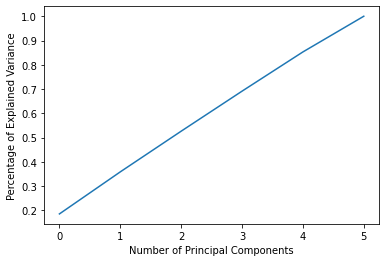

In [30]:
#Scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Principal Components")
plt.ylabel("Percentage of Explained Variance")
plt.show();

In [42]:
#Knowing that we want 5 components in our PCA, we repeat to generate a 'final_pca'
final_pca = PCA(n_components = 5, random_state = 369)

#Fit the PCA then transform
final_pca.fit(X_std)
final_X_pca = final_pca.transform(X_std)

#Generate PCA loadings for final_pca
final_X_pca_loadings = pd.DataFrame(final_pca.components_.T, 
                              columns = ["PC1", "PC2", "PC3", "PC4", "PC5"], index = X_cols)
final_X_pca_loadings

,PC1,PC2,PC3,PC4,PC5
Lat,0.707758,0.043688,-0.011824,-0.084460,0.099423
Lng,-0.698786,-0.023200,-0.134689,-0.128656,0.093751
Income,-0.085710,0.436801,0.473664,0.729930,-0.119732
VitD_levels,0.058327,-0.246033,-0.732909,0.576021,-0.254160
TotalCharge,-0.003639,-0.609034,0.409425,-0.043671,-0.663482
Additional_charges,-0.003983,-0.612620,0.229296,0.331374,0.679842


In [44]:
#Show the individual contribution of each PC to the whole
print(f"The amount of variance for by each principal component can be seen here:")

#Printing list of explained_variance_ratio_ values
pc_contributions = list(final_pca.explained_variance_ratio_)
pc_names = list(final_X_pca_loadings.columns)
for i in range(len(pc_names)):
    print(f"For {pc_names[i]}, the contribution is {round(pc_contributions[i] * 100, 3)}%")

The amount of variance for by each principal component can be seen here:
For PC1, the contribution is 18.558%
For PC2, the contribution is 17.326%
For PC3, the contribution is 16.759%
For PC4, the contribution is 16.491%
For PC5, the contribution is 16.163%


In [46]:
print(f"These 5 principal components explain {round(sum(final_pca.explained_variance_ratio_ * 100), 3)}% of variance in the data.")

These 5 principal components explain 85.296% of variance in the data.


In [48]:
#Split the final_X_pca (which has been fit and transformed) to train and test sets for classification; 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(final_X_pca, y, train_size = 0.8, test_size=0.2, random_state = 369, stratify = y)

#Verifying the X sets are shaped as expected, to reflect the 11 PC's
print(f"The shape of the X_train set is: {X_train.shape}")
print(f"The shape of the X_test set is: {X_test.shape}")

The shape of the X_train set is: (8000, 5)
The shape of the X_test set is: (2000, 5)


In [50]:
#Instantiate our classification model
classification_model = DecisionTreeClassifier(random_state=369).fit(X_train, y_train)
y_predictions = classification_model.predict(X_test)

#Generate accuracy report for this model
test_accuracy = accuracy_score(y_test, y_predictions)
print(f'Decision tree accuracy: {test_accuracy}') 

#Predict the test set probabilities
y_pred_proba = classification_model.predict_proba(X_test)[:,1]

#Generate Confusion Matrix
final_matrix = confusion_matrix(y_test, y_predictions)
print("\nThe confusion matrix for this Decision Tree model:")
print("Predicted No Readmission  | Predicted Readmission")
print(f"                    {final_matrix[0]} Actual No Readmission")
print(f"                     {final_matrix[1]} Actual Readmission\n")

Decision tree accuracy: 0.8995

The confusion matrix for this Decision Tree model:
Predicted No Readmission  | Predicted Readmission
                    [1153  113] Actual No Readmission
                     [ 88 646] Actual Readmission



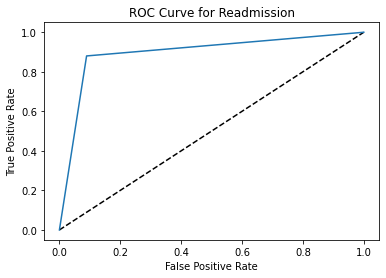

Area Under the Curve (AUC) score: 0.8954257439380829


In [52]:
#Generate ROC plot and AUC score 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Readmission')
plt.show()

#Compute roc_auc
roc_auc = roc_auc_score(y_test, y_pred_proba)

#Print test_roc_auc
print(f'Area Under the Curve (AUC) score: {roc_auc}')